# Summarise and Visualisation

In [1]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
def process_data(data_file):
    data_different_row = [row.split() for row in data_file.strip().split('\n')]
    data_matrix = np.expand_dims(np.array(data_different_row, dtype=float), axis=-1)
    data_matrix = np.concatenate((data_matrix[:, :5], data_matrix[:, 5:10], data_matrix[:, 10:15], data_matrix[:, 15:20], data_matrix[:, 20:]), axis=-1)

    return data_matrix

In [13]:

synthetic_main = '''
38.72	45.77	47.89	47.65	48.81	53.7	62.7	62.79	60.08	57.64	32.52	31.06	27.14	26.24	26.49	20.91	24.59	24.68	23.6	23.1	36.78	43.19	46.16	48.06	50.55
128.23	157.42	149.67	156.99	165.87	95.89	116.6	110.94	116.47	122.71	98.06	115.33	119.98	129.34	138.92	84.82	103.44	112.4	126.8	135.04	81.99	98.44	95.95	106.64	112.61
210.26	256.08	222.67	209.23	199.17	159.13	188.76	165.05	154.06	145.58	110.65	126.96	106.12	98.83	93.25	90.94	102.66	89.58	83.77	79.29	122.93	145.67	125.13	117.04	110.48
321.88	383.84	315.67	299.75	272.67	275.69	323.64	273.36	255.11	238.85	178.35	204.81	163.81	154.64	139.16	161.99	190.24	154.97	145.17	129.86	210.67	245.79	196.95	186.83	161.6
334.18	399.78	329.11	312.35	280.25	271.78	318.94	263.04	246.17	216.22	180.02	205.14	166.16	155.83	142.56	152.46	178.35	142.29	133.61	113.86	215.34	251.96	204.05	193.69	171.69
146.96	167.65	207.92	157.29	256.08	92.06	97.5	105.74	74.33	97.1	69.24	67.01	71.77	50.77	68.75	71.04	76.94	93.15	65.17	102.08	89.37	96.04	111.47	95.08	137.37
152.52	173.81	198.76	156.15	203.4	147	164.38	183.5	130.62	193	97.37	104	91.14	79.38	76.45	101.74	115.47	135.4	101.09	146.9	74.92	75.61	76.8	58.85	66.2
161.42	187.59	237.4	283.79	140	87.21	89.11	101.8	91.65	85.71	79.07	84.19	93.37	112.61	44.16	58.32	60.3	75.4	82.85	45.46	172.29	189.22	244.89	308.32	124.1
'''
synthetic_main_matrix = process_data(synthetic_main)
print(f'create matrix of shape {synthetic_main_matrix.shape}')
print(f'Synthetic mean average results is \n {np.mean(synthetic_main_matrix, axis=-1)}')

create matrix of shape (8, 5, 5)
Synthetic mean average results is 
 [[ 36.526  41.462  41.732  41.126  41.318]
 [ 97.798 118.246 117.788 127.248 135.03 ]
 [138.782 164.026 141.71  132.586 125.554]
 [229.716 269.664 220.952 208.3   188.428]
 [230.756 270.834 220.93  208.33  184.916]
 [ 93.734 101.028 118.01   88.528 132.276]
 [114.71  126.654 137.12  105.218 137.19 ]
 [111.662 122.082 150.572 175.844  87.886]]


In [5]:
def get_p_matrix(matrix):
    N, T, s = matrix.shape
    p_value_matrix = np.zeros((N, N))

    # Perform t-tests between all pairs of models
    for i in range(N):
        for j in range(i, N):
            if i == j:
                # Diagonal should be zero since it is the same model
                p_value_matrix[i, j] = 0.0
            else:
                # Flatten the arrays to combine all measurements and seeds
                model_i = matrix[i].flatten()
                model_j = matrix[j].flatten()

                # Perform the t-test
                t_stat, p_value = ttest_ind(model_i, model_j, equal_var=False)

                if p_value < 0.001:
                    p_value = -0.001
                elif p_value < 0.05:
                    p_value = -0.05
                else:
                    p_value = p_value

                # Store the p-value in the matrix
                p_value_matrix[i, j] = p_value
                p_value_matrix[j, i] = 0.0  # Symmetric matrix
    
    return p_value_matrix

In [15]:
p_matrix = get_p_matrix(synthetic_main_matrix)
for line in p_matrix:
    print(line)
# print(get_p_matrix(synthetic_main_matrix))

[ 0.    -0.001 -0.001 -0.001 -0.001 -0.001 -0.001 -0.001]
[ 0.          0.          0.05737748 -0.001      -0.001       0.24921046
  0.62747007  0.51046345]
[ 0.          0.          0.         -0.001      -0.001      -0.05
  0.22846242  0.54482357]
[ 0.          0.          0.          0.          0.98997388 -0.001
 -0.001      -0.001     ]
[ 0.     0.     0.     0.     0.    -0.001 -0.001 -0.001]
[0.         0.         0.         0.         0.         0.
 0.19462488 0.2053983 ]
[0.         0.         0.         0.         0.         0.
 0.         0.75756781]
[0. 0. 0. 0. 0. 0. 0. 0.]


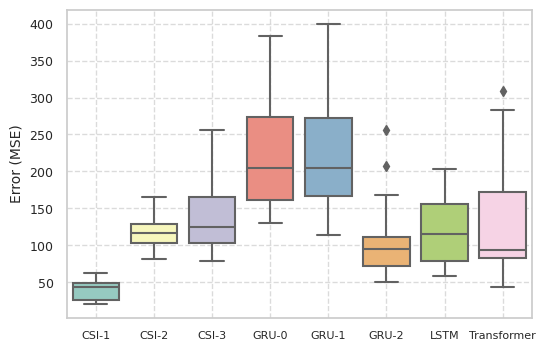

In [17]:
model_names = ["CSI-1", "CSI-2", "CSI-3", "GRU-0", "GRU-1", "GRU-2", "LSTM", "Transformer"]

custom_palette = {
    'CSI-1': sns.color_palette("Set3")[0],
    'CSI-2': sns.color_palette("Set3")[1],
    'CSI-3': sns.color_palette("Set3")[2],
    'GRU-0': sns.color_palette("Set3")[3],
    'GRU-1': sns.color_palette("Set3")[4],
    'GRU-2': sns.color_palette("Set3")[5],
    'LSTM': sns.color_palette("Set3")[6],
    'Transformer': sns.color_palette("Set3")[7]
}

color_list = [custom_palette[model] for model in model_names]

B, T, N = synthetic_main_matrix.shape
data_reshaped = synthetic_main_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette=color_list, linewidth=1.5)
# plt.xlabel('Models', fontsize=10)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=8)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
synthetic_different_k = """
46.59 54.33 57.32 55.64 56.23 60.23 68.5 63.76 60.05 57.07 42.6 42.63 39.35 39.94 40.69 25.84 30.27 31.88 30.77 30.66 51.22 56.28 50.84 48.14 45.74
38.72 45.77 47.89 47.65 48.81 53.7 62.7 62.79 60.08 57.64 32.52 31.06 27.14 26.24 26.49 20.91 24.59 24.68 23.6 23.1 36.78 43.19 46.16 48.06 50.55
39.11 46.34 48.78 49.18 50.37 51.42 60.04 59.84 57.32 54.97 34.55 37.27 36.02 35.38 36.44 21.56 25.37 25.68 24.65 24.16 35.69 42.02 43.17 44.21 45.43
64.08 77.43 90.1 101.5 115.37 54.44 66.22 69.74 69.99 72.23 29.91 29.21 24.3 23.66 23.26 16.42 19.36 18.63 18.29 18.39 31.69 37.86 38.88 39.04 39.28
46.27 55.94 63.15 67.19 71.23 55.65 67.48 73.79 75.38 80.46 31.46 31.07 25.68 24.81 24.26 17.02 20.06 19.83 19.16 19.34 31.29 37.25 38.18 38.52 39.28
43.24 52.14 58.33 63.11 68.09 51.34 62.32 64.48 61.19 60.94 29.66 28.7 23.63 23.24 23.08 17.51 20.75 20.8 20.57 20.63 29.7 35.36 36.86 37.52 38.46
"""
synthetic_k_matrix = process_data(synthetic_different_k)
print(f'create matrix of shape {synthetic_k_matrix.shape}')

create matrix of shape (6, 5, 5)


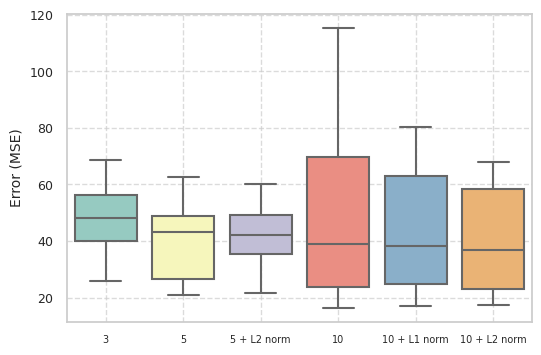

In [29]:
model_names = ["3", "5", "5 + L2 norm", "10", "10 + L1 norm", "10 + L2 norm"]

B, T, N = synthetic_k_matrix.shape
data_reshaped = synthetic_k_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette="Set3")
# plt.xlabel('Latent Dimension', fontsize=10)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=7)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [30]:
synthetic_different_n ='''
38.72	45.77	47.89	47.65	48.81	53.7	62.7	62.79	60.08	57.64	32.52	31.06	27.14	26.24	26.49	20.91	24.59	24.68	23.6	23.1	36.78	43.19	46.16	48.06	50.55
32.45	39.13	41.95	43.47	44.62	48.95	57.5	55.72	53.06	51.21	23.55	23.11	19.75	18.95	18.36	21.43	25.3	26.04	25.46	25.45	30.45	35.39	37.46	38.19	39.37
28.79	34.33	36.24	36.32	37.71	65.96	77.17	77.18	74.53	71.91	21.79	24.06	22.43	23.18	23.58	18.61	22.25	23.8	23.86	22.8	26.92	31.54	33.16	34.85	36.93
146.96	167.65	207.92	157.29	256.08	92.06	97.5	105.74	74.33	97.1	69.24	67.01	71.77	50.77	68.75	71.04	76.94	93.15	65.17	102.08	89.37	96.04	111.47	95.08	137.37
198.92	231.19	292.7	244.5	385.78	81.95	90.97	101.67	68.31	97.73	114.22	128.54	131.05	105.17	143.94	62.49	66.54	81.97	55.86	89.9	105.2	115.62	144.32	106.71	179.44
196.4	224.2	285.1	196.04	334.49	77.25	87.7	104.43	84.29	80.55	87.2	94.89	94.05	69.86	81.42	37.83	36.71	42.98	27.71	37.74	123.06	135.6	169.97	129.43	201.63
'''

synthetic_n_matrix = process_data(synthetic_different_n)
print(f'create matrix of shape {synthetic_n_matrix.shape}')

create matrix of shape (6, 5, 5)


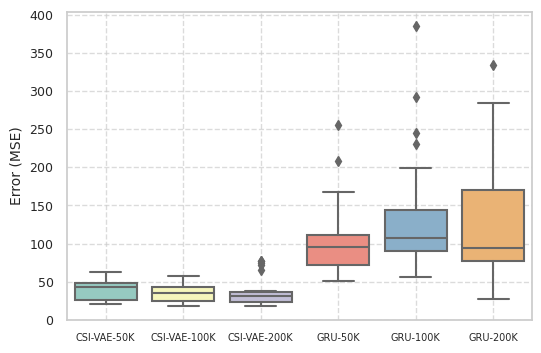

In [32]:
model_names = ["CSI-VAE-50K", "CSI-VAE-100K", "CSI-VAE-200K", "GRU-50K", "GRU-100K", "GRU-200K"]

B, T, N = synthetic_n_matrix.shape
data_reshaped = synthetic_n_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette="Set3")
# plt.xlabel('Training Data Size', fontsize=10)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=7)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### For Spotify Results

In [3]:

spotify_main = """
40.58	49.17	51.54	51.86	51.55	131.62	160.72	158.63	155.76	151.85	55.29	66.45	63.39	61.33	59.06	67.18	82.03	85.9	83.24	78.94	46.5	56.33	58.18	57.67	56.73
132.01	161.17	149.2	154	159.31	188.04	231.16	193.11	181.48	183.53	166.48	201.74	172.8	160.79	157.37	652.58	810.72	869.81	881.95	868.57	130.12	157.84	140.46	140.2	145.37
654.5	810.65	693.58	611.88	551.85	1015.24	1255.04	1085.07	963.35	873.18	648.82	796.31	679	597.22	537.5	831	1030.65	872.28	761.96	682.48	640.13	792.69	672.8	588.89	528.57
151.16	181.72	127.72	81.64	69.16	311.61	379.42	288.25	214.07	180.64	227.44	274.32	212.79	159.75	138.93	227.49	276.06	200.6	136.28	114.17	159.39	191.74	137.69	94.26	82.39
166.1	199.9	152.89	95.39	93.3	337.31	408.9	319.38	236.14	205.56	238.89	286.54	228.71	171.23	153.67	207.26	250.23	178.65	108.88	93.38	168.5	202.87	149.93	96.03	85.88
115.01	139.79	139.33	100.95	108.82	231.79	283	259.08	203.64	187.85	153.24	185.12	166.34	126.72	113.1	156.05	190.37	189.17	130.17	130.01	114.83	138.81	135.89	105.3	98.11
76.68	91.59	76.47	51.45	44.19	215.04	260.2	220.04	156.15	139.18	151.23	180.05	151.64	115.98	104.78	127.26	151	136.28	92.73	90.43	81.56	97.28	81.95	55.46	51.04
148.23	174.68	195.6	258.68	277.81	164.16	194.32	165.57	128.99	113.51	138.08	163.71	145.18	140.7	132.8	78.43	91.32	83.33	73.56	67.58	138.2	164.27	183.39	221.6	198.45
"""

spotify_main_matrix = process_data(spotify_main)
print(f'create matrix of shape {spotify_main_matrix.shape}')
print(f'Spotify mean average results is \n {np.mean(spotify_main_matrix, axis=-1)}')

create matrix of shape (8, 5, 5)
Spotify mean average results is 
 [[ 68.234  82.94   83.528  81.972  79.626]
 [253.846 312.526 305.076 303.684 302.83 ]
 [757.938 937.068 800.546 704.66  634.716]
 [215.418 260.652 193.41  137.2   117.058]
 [223.612 269.688 205.912 141.534 126.358]
 [154.184 187.418 177.962 133.356 127.578]
 [130.354 156.024 133.276  94.354  85.924]
 [133.42  157.66  154.614 164.706 158.03 ]]


In [6]:
print(get_p_matrix(spotify_main_matrix))

[[ 0.         -0.001      -0.001      -0.001      -0.001      -0.001
  -0.05       -0.001     ]
 [ 0.          0.         -0.001       0.05838809  0.08084802 -0.05
  -0.05       -0.05      ]
 [ 0.          0.          0.         -0.001      -0.001      -0.001
  -0.001      -0.001     ]
 [ 0.          0.          0.          0.          0.7054523   0.12938715
  -0.05        0.10946841]
 [ 0.          0.          0.          0.          0.          0.0608959
  -0.001       0.05150527]
 [ 0.          0.          0.          0.          0.          0.
  -0.05        0.86987713]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.05      ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


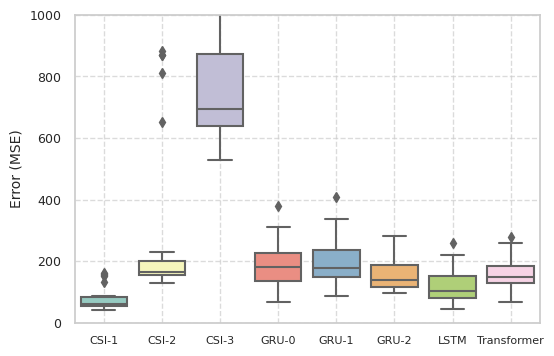

In [18]:
model_names = ["CSI-1", "CSI-2", "CSI-3", "GRU-0", "GRU-1", "GRU-2", "LSTM", "Transformer"]

B, T, N = spotify_main_matrix.shape
data_reshaped = spotify_main_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette="Set3")
# plt.xlabel('Models', fontsize=10)
plt.ylim(0, 1000)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=8)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [9]:
spotify_selected_matrix = np.vstack((spotify_main_matrix[:2], spotify_main_matrix[3:]))
# np.mean(spotify_selected_matrix, axis=-1)

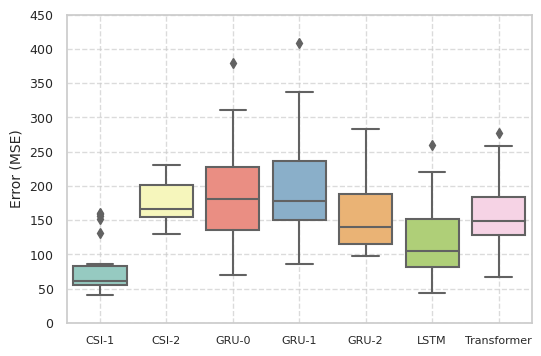

In [19]:
model_names = ["CSI-1", "CSI-2", "GRU-0", "GRU-1", "GRU-2", "LSTM", "Transformer"]

custom_palette = {
    'CSI-1': sns.color_palette("Set3")[0],
    'CSI-2': sns.color_palette("Set3")[1],
    'CSI-3': sns.color_palette("Set3")[2],
    'GRU-0': sns.color_palette("Set3")[3],
    'GRU-1': sns.color_palette("Set3")[4],
    'GRU-2': sns.color_palette("Set3")[5],
    'LSTM': sns.color_palette("Set3")[6],
    'Transformer': sns.color_palette("Set3")[7]
}

color_list = [custom_palette[model] for model in model_names]

B, T, N = spotify_selected_matrix.shape
data_reshaped = spotify_selected_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette=color_list)
# plt.xlabel('Models', fontsize=10)
plt.ylim(0, 450)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=8)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [67]:
spotify_different_n ='''
40.58	49.17	51.54	51.86	51.55	131.62	160.72	158.63	155.76	151.85	55.29	66.45	63.39	61.33	59.06	67.18	82.03	85.9	83.24	78.94	46.5	56.33	58.18	57.67	56.73
31.89	38.54	38.73	38.38	37.65	89.05	108.84	109.59	109.06	106.82	70.38	85.13	84.15	73.94	68.57	71.64	87.76	96.71	99.68	100.09	29.36	35.25	34.51	33.55	32.47
33.34	40.44	40.78	40.08	38.85	99.75	122.06	127.68	126.65	122.9	44.59	53.51	53.93	53.04	52.23	55.43	67.08	65.17	62.78	60.11	25.82	30.98	30.3	29.57	29.11
115.01	139.79	139.33	100.95	108.82	231.79	283	259.08	203.64	187.85	153.24	185.12	166.34	126.72	113.1	156.05	190.37	189.17	130.17	130.01	114.83	138.81	135.89	105.3	98.11
99.19	119.28	121.22	81.26	81.04	212.65	259.64	244.08	193.07	190.97	163.89	198.81	182.96	140.93	125.33	124.39	150.26	143.34	88.95	85.24	110.23	133.7	130.78	93.67	92.92
95.31	115.54	119.8	86.99	80.02	203.47	249.22	233.39	186.74	174.36	141.72	172.33	165.87	118.51	119.03	103.91	125.16	120.6	76.9	77.52	92.62	112.07	114.83	71.12	83
'''

spotify_n_matrix = process_data(spotify_different_n)
print(f'create matrix of shape {spotify_n_matrix.shape}')

create matrix of shape (6, 5, 5)


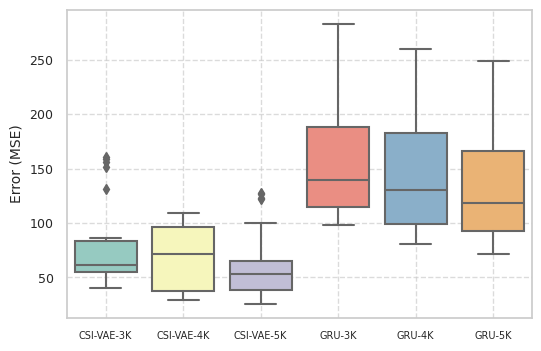

In [69]:
model_names = ["CSI-VAE-3K", "CSI-VAE-4K", "CSI-VAE-5K", "GRU-3K", "GRU-4K", "GRU-5K"]

B, T, N = spotify_n_matrix.shape
data_reshaped = spotify_n_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette="Set3")
# plt.xlabel('Training Data Size', fontsize=10)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=7)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [4]:
spotify_median = '''
2.38	2.82	2.9	2.95	2.97	2.68	3.27	3.28	3.26	3.25	2.15	2.54	2.58	2.64	2.64	2.26	2.72	2.76	2.73	2.7	2.57	3.14	3.25	3.27	3.32
2.73	3.48	3.45	3.42	3.38	3.33	4.37	4.42	4.32	4.35	3.38	4.3	4.56	4.71	4.69	4.58	6.19	6.78	7.29	8.08	4.18	5.16	5.71	6.14	6.46
3.62	4.87	4.69	4.55	4.36	3.98	5.83	5.61	5.46	5.28	3.5	5.03	4.73	4.56	4.46	3.88	5.48	5.2	5.01	4.9	3.4	4.54	4.32	4.12	4.12
1.76	2.01	1.84	1.68	1.52	1.98	2.59	2.3	2.02	1.7	1.76	2.24	2	1.73	1.47	1.76	2.1	1.96	1.7	1.48	1.69	2.01	1.79	1.66	1.48
1.84	2.27	2.05	1.85	1.62	1.9	2.31	2.06	1.8	1.58	1.72	2.22	2	1.7	1.52	1.77	2.26	2.03	1.85	1.61	1.67	2.15	1.87	1.69	1.49
1.66	1.92	1.9	1.74	1.74	1.74	2.07	2.04	1.83	1.81	1.51	1.77	1.83	1.64	1.64	1.71	2	1.98	1.8	1.76	1.59	1.81	1.77	1.65	1.56																								
'''

spotify_median_matrix = process_data(spotify_median)
print(f'create matrix of shape {spotify_median_matrix.shape}')
print(f'Synthetic mean average results is \n {np.mean(spotify_median_matrix, axis=-1)}')

create matrix of shape (6, 5, 5)
Synthetic mean average results is 
 [[2.408 2.898 2.954 2.97  2.976]
 [3.64  4.7   4.984 5.176 5.392]
 [3.676 5.15  4.91  4.74  4.624]
 [1.79  2.19  1.978 1.758 1.53 ]
 [1.78  2.242 2.002 1.778 1.564]
 [1.642 1.914 1.904 1.732 1.702]]


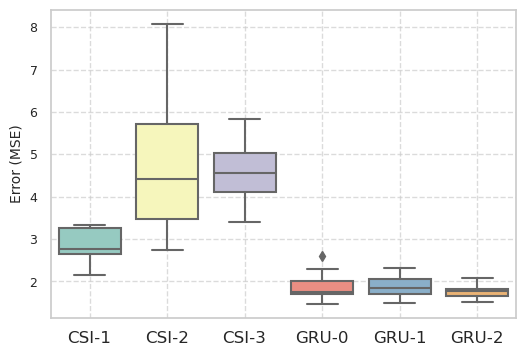

In [6]:
model_names = ["CSI-1", "CSI-2", "CSI-3", "GRU-0", "GRU-1", "GRU-2"]

custom_palette = {
    'CSI-1': sns.color_palette("Set3")[0],
    'CSI-2': sns.color_palette("Set3")[1],
    'CSI-3': sns.color_palette("Set3")[2],
    'GRU-0': sns.color_palette("Set3")[3],
    'GRU-1': sns.color_palette("Set3")[4],
    'GRU-2': sns.color_palette("Set3")[5]
}

color_list = [custom_palette[model] for model in model_names]

B, T, N = spotify_median_matrix.shape
data_reshaped = spotify_median_matrix.reshape(B, -1).T
# Create a box plot for each model
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.boxplot(data=data_reshaped, palette=color_list)
# plt.xlabel('Models', fontsize=10)
plt.ylabel('Error (MSE)', fontsize=10)
# plt.title('Box Plot of Results for Each Model', fontsize=8)
plt.xticks(ticks=range(B), labels=model_names, fontsize=12)
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()